## SInCohMap data access and processing examples
### Author michele.claus@eurac.edu
### Date: 2022/02/22

## Useful links:

SAR2Cube website: https://sar2cube.projects.eurac.edu/

openEO main website: https://openeo.org/

openEO Web Editor (graphical interface): https://editor.openeo.org
connect to EURAC using https://openeo.eurac.edu

openEO Python Client documentation: https://open-eo.github.io/openeo-python-client/index.html

Getting started guide for openEO with python: https://openeo.org/documentation/1.0/python/

## FAQ:
**Q: I receive a 403 error, what does it mean?**

A: If you get a 403 error, it usually means that the connection with the openEO back-end dropped. Please re run

`conn = openeo.connect(openeoHost).authenticate_oidc(client_id="openEO_PKCE")`

and re run you code from `load_collection` onwards.

**Q: I receive a 500 error, what does it mean?**

A: It is a server error: something went wrong processing your request. Please check carefully that the area and time range you are requesting are available in the datacube (you can use `conn.describe_collection('COLLECTION_NAME')`) Currently the error logs are not passed if you run your request as a synchronous call (i.e. using `.download()`). If you run you process as a batch job you will get a more informative error message.

**Q: I receive a 502 error, what does it mean?**

A: If you get an error similar to: _[502] unknown: Received 502 Proxy Error. This typically happens if an OpenEO request takes too long and is killed. Consider using batch jobs instead of doing synchronous processing._
The message is already explaining you the problem: you are using a synchronous call (.download()) to run a process which is taking too much to complete. You need to use a batch job in this case.

If you already started a batch job, please try to list the jobs with:
`conn.list_jobs()`
and check if it's actually running of it has been stopped due to an error.

### Import all the libraries and utilities functions included in the eo_utils.py file

In [1]:
from eo_utils import *

### Connect and login

In [2]:
openeoHost = "https://openeo.eurac.edu"
conn = openeo.connect(openeoHost).authenticate_oidc(client_id="openEO_PKCE")

Authenticated using refresh token.


Please check to have the latest openeo library. openeo >= 0.9.0 is required

In [3]:
openeo.__version__

'0.9.2'

### Get the info of our account:

In [4]:
conn.describe_account()

{'user_id': 'dfd05cf2-30d1-4139-9cda-493787936318',
 'name': 'MIchele Claus',
 'links': None}

### Discover the available collections:

In [5]:
conn.list_collections()

[{'stac_version': '0.9.0',
  'stac_extensions': ['datacube', 'scientific'],
  'id': 'ADO_CORINE_100m_3035_ODC',
  'title': 'Corine Land Cover (CLC) 2018',
  'description': 'CLC2018 is one of the Corine Land Cover (CLC) datasets produced within the frame the Copernicus Land Monitoring Service referring to land cover / land use status of year 2018. CLC service has a long-time heritage (formerly known as "CORINE Land Cover Programme"), coordinated by the European Environment Agency (EEA). It provides consistent and thematically detailed information on land cover and land cover changes across Europe.',
  'keywords': ['Copernicus',
   'Land',
   'Satellite Image Interpretation',
   '2018',
   'Corine',
   'Corine Land Cover'],
  'version': 'v1',
  'deprecated': False,
  'license': 'CC-BY-4.0',
  'sci:citation': 'Copyright holder: European Environment Agency (EEA)',
  'providers': [{'name': 'Eurac EO ODC',
    'url': 'https://www.eurac.edu',
    'roles': ['host']},
   {'name': 'European Environment Agency (EEA)',
    'url': 'mailto:copernicus@eea.europa.eu',
    'roles': ['producer']}],
  'extent': {'spatial': {'bbox': [[3.097476122153762,
      42.49699937418966,
      17.50687107025045,
      50.35760819184301]]},
   'temporal': {'interval': [['2018-01-01T23:59:00Z',
      '2018-01-01T23:59:00Z']]}},
  'links': [{'rel': 'licence',
    'href': 'https://creativecommons.org/licenses/by/4.0/',
    'type': 'text/html',
    'title': 'License Link'}],
  'cube:dimensions': {'DATE': {'type': 'temporal',
    'extent': ['2018-01-01T23:59:00+00:00', '2018-01-01T23:59:00+00:00']},
   'X': {'type': 'spatial',
    'axis': 'x',
    'extent': [3.097476122153762, 17.50687107025045],
    'reference_system': 3035},
   'Y': {'type': 'spatial',
    'axis': 'y',
    'extent': [42.49699937418966, 50.35760819184301],
    'reference_system': 3035},
   'bands': {'type': 'bands', 'values': ['CLC2018_WM']}},
  'summaries': {'rows': 8332, 'columns': 10240, 'gsd': [100.0]}},
 {'stac_version': '0.9.0',
  'stac_extensions': ['datacube'],
  'id': 'ADO_NDVI_MODIS_231m_3035_ODC',
  'title': 'ADO_NDVI_MODIS_231m_3035_ODC',
  'description': 'ADO_NDVI_MODIS_231m_3035_ODC',
  'deprecated': False,
  'license': 'CC-BY-4.0',
  'providers': [{'name': 'Eurac EO ODC',
    'url': 'http://www.eurac.edu/',
    'roles': ['producer', 'host']}],
  'extent': {'spatial': {'bbox': [[3.5446677656937715,
      42.28250560234868,
      18.990556343370127,
      48.77837603135202]]},
   'temporal': {'interval': [['2000-02-25T23:59:00Z',
      '2020-11-11T23:59:00Z']]}},
  'links': [{'rel': 'license',
    'href': 'https://creativecommons.org/licenses/by/4.0/',
    'type': 'text/html',
    'title': 'License link'}],
  'cube:dimensions': {'DATE': {'type': 'temporal',
    'extent': ['2000-02-25T23:59:00+00:00', '2020-11-11T23:59:00+00:00']},
   'X': {'type': 'spatial',
    'axis': 'x',
    'extent': [3.5446677656937715, 18.990556343370127],
    'reference_system': 3035},
   'Y': {'type': 'spatial',
    'axis': 'y',
    'extent': [42.28250560234868, 48.77837603135202],
    'reference_system': 3035},
   'bands': {'type': 'bands', 'values': ['QA', 'DOY', 'NDVI', 'PLATFORM']}}},
 {'stac_version': '0.9.0',
  'stac_extensions': ['datacube'],
  'id': 'Backscatter_Sentinel1_Track015',
  'title': 'Backscatter_Sentinel1_Track015',
  'description': 'Sentinel-1 Data',
  'deprecated': False,
  'license': 'CC-BY-4.0',
  'providers': [{'name': 'Eurac EO ODC',
    'url': 'http://www.eurac.edu/',
    'roles': ['producer', 'host']}],
  'extent': {'spatial': {'bbox': [[6.568274408568806,
      43.36699117383023,
      11.94569379468819,
      48.09694046058147]]},
   'temporal': {'interval': [['2014-11-11T17:15:03Z',
      '2016-09-25T17:15:19Z']]}},
  'links': [{'rel': 'license',
    'href': 'https://creativecommons.org/licenses/by/4.0/',
    'type': 'text/html',
    'title': 'License link'}],
  'cube:dimensions': {'DATE': {'type': 'temporal',
    'extent': ['2014-11-11T17:15:03+00:00', '2016-09-25T17:15:19+00

### Discover the available processes:

In [6]:
conn.list_processes()

[{'engine': '[ODC_DASK]',
  'id': 'dimension_labels',
  'summary': 'Get the dimension labels',
  'description': 'Returns all labels for a dimension in the data cube. The labels have the same order as in the data cube.',
  'parameters': [{'schema': {'subtype': 'raster-cube', 'type': 'object'},
    'name': 'data',
    'description': 'The data cube.'},
   {'schema': {'type': 'string'},
    'name': 'dimension',
    'description': 'The name of the dimension to get the labels for.'}],
  'categories': ['cubes'],
  'returns': {'schema': {'type': 'array',
    'items': {'anyOf': [{'type': 'number'}, {'type': 'string'}]}},
   'description': 'The labels as array.'},
  'exceptions': {}},
 {'engine': '[WCPS, ODC_DASK]',
  'id': 'ln',
  'summary': 'Natural logarithm',
  'description': 'The natural logarithm is the logarithm to the base *e* of the number `x`, which equals to using the *log* process with the base set to *e*. The natural logarithm is the inverse function of taking *e* to the power x.\n\nThe no-data value `null` is passed through.\n\nThe computations follow [IEEE Standard 754](https://ieeexplore.ieee.org/document/8766229) whenever the processing environment supports it. Therefore, `ln(0)` results in ±infinity if the processing environment supports it or otherwise an error is thrown.',
  'parameters': [{'schema': {'type': ['number', 'null']},
    'name': 'x',
    'description': 'A number to compute the natural logarithm for.'}],
  'categories': ['math > exponential & logarithmic'],
  'links': [{'rel': 'about',
    'href': 'http://mathworld.wolfram.com/NaturalLogarithm.html',
    'title': 'Natural logarithm explained by Wolfram MathWorld'},
   {'rel': 'about',
    'href': 'https://ieeexplore.ieee.org/document/8766229',
    'title': 'IEEE Standard 754-2019 for Floating-Point Arithmetic'}],
  'returns': {'schema': {'type': ['number', 'null']},
   'description': 'The computed natural logarithm.'},
  'exceptions': {},
  'examples': [{'arguments': {'x': 1}, 'returns': 0}]},
 {'engine': '[ODC_DASK]',
  'id': 'coherence',
  'summary': 'Compute the complex coherence with SAR data',
  'description': 'Compute the complex coherence with SAR data, given the specified time delta.',
  'parameters': [{'schema': {'subtype': 'raster-cube', 'type': 'object'},
    'name': 'data',
    'description': 'A raster data cube with exactly two horizontal spatial dimensions and an arbitrary number of additional dimensions. The process is applied to all additional dimensions individually.'},
   {'schema': {'type': 'integer',
     'enum': [6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84, 90, 96]},
    'default': '6',
    'name': 'timedelta',
    'description': 'Temporal delta in days between acquisitions on which we want to compute coherence.',
    'optional': True}],
  'categories': ['cubes', 'math'],
  'returns': {'schema': {'subtype': 'raster-cube', 'type': 'object'},
   'description': 'A data cube with the projected values in the requested projection.'},
  'exceptions': {}},
 {'engine': '[WCPS]',
  'id': 'cos',
  'summary': 'Cosine',
  'description': 'Computes the cosine of `x`.\n\nWorks on radians only.\nThe no-data value `null` is passed through and therefore gets propagated.',
  'parameters': [{'schema': {'type': ['number', 'null']},
    'name': 'x',
    'description': 'An angle in radians.'}],
  'categories': ['math > trigonometric'],
  'links': [{'rel': 'about',
    'href': 'http://mathworld.wolfram.com/Cosine.html',
    'title': 'Cosine explained by Wolfram MathWorld'}],
  'returns': {'schema': {'type': ['number', 'null']},
   'description': 'The computed cosine of `x`.'},
  'exceptions': {},
  'examples': [{'arguments': {'x': 0}, 'returns': 1}]},
 {'engine': '[WCPS, ODC_DASK]',
  'id': 'lt',
  'summary': 'Less than comparison',
  'description': 'Compares whether `x` is strictly less than `y`.\n\n**Remarks:**\n\n* If any operand is `null`, the return value is `null`.\n* If any operand is an array or object, the return value is `false`.\n* If any

## Select the AOI
Use the rectangle selection tool to select the area of interest

In [7]:
center = [37.2, -6.2]
zoom = 9

eoMap = openeoMap(center,zoom)
eoMap.map

Map(center=[37.2, -6.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

In [8]:
bbox = eoMap.getBbox()
print("Coordinates selected from map:",'\n west',bbox[0],'\n east',bbox[2],'\n south',bbox[1],'\n north',bbox[3])

IndexError: tuple index out of range

In [ ]:
spatial_extent  = {'west':bbox[0],'east':bbox[2],'south':bbox[1],'north':bbox[3]}

## Doñana Datacubes:
Sentinel-1:
```
SAR2Cube_SInCohMap_S1_L0_147_ASC_DONYANA
SAR2Cube_SInCohMap_S1_L0_154_DSC_DONYANA
```
Sentinel-2:
```
SInCohMap_S2_L1C_T29SQB
```
## South Tyrol Datacubes
Sentinel-1:
```
SAR2Cube_SInCohMap_S1_L0_117_ASC_SOUTH_TYROL
SAR2Cube_SInCohMap_S1_L0_168_DSC_SOUTH_TYROL
```
Sentinel-2:
```
S2_L1C_T32TPS
```
## Finland Datacubes
Sentinel-1:
```
SAR2Cube_SInCohMap_S1_L0_80_DSC_FINLAND_AOI1
SAR2Cube_SInCohMap_S1_L0_80_DSC_FINLAND_AOI2
```

# SAR processing


### Load the datacube

In [ ]:
conn = openeo.connect(openeoHost).authenticate_oidc(client_id="openEO_PKCE")

collection      = 'SAR2Cube_SInCohMap_S1_L0_147_ASC_DONYANA'
temporal_extent = ["2018-06-01T00:00:00.000Z", "2018-06-30T00:00:00.000Z"]

S1_slant_range = conn.load_collection(collection,spatial_extent=spatial_extent,temporal_extent=temporal_extent)

### Compute the VH intensity
We compute the intensity from the complex data

In [ ]:
i_VH = S1_slant_range.band('i_VH')
q_VH = S1_slant_range.band('q_VH')
S1_INT = i_VH**2+q_VH**2
S1_INT_VH = S1_INT.add_dimension(name="bands",label="VH")

### Compute the Multi-Look
The size of the multi-look window can be changed depending on the requirements. Have a look at the following image explaining Multi-Look. [source: ESA](https://step.esa.int/docs/tutorials/S1TBX%20SAR%20Basics%20Tutorial.pdf)
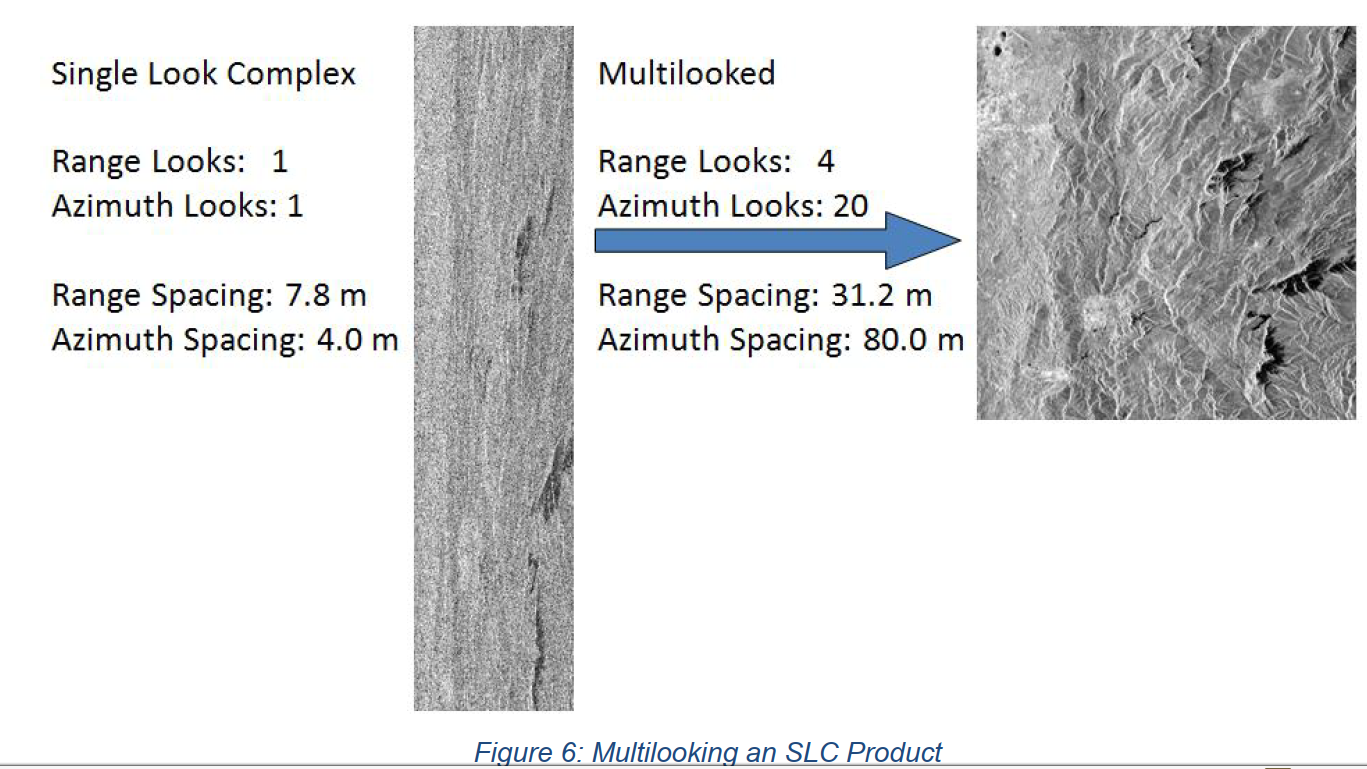

In [ ]:
range_looks   = 4
azimuth_looks = 19

args_aggregate_spatial_window = {"data": THIS, "boundary": "trim", "size": [azimuth_looks,range_looks],"reducer":S1_INT_VH._get_callback(mean,parent_parameters=["data"])}

S1_INT_ML = S1_INT_VH.process("aggregate_spatial_window",args_aggregate_spatial_window)

### Temporal average
We reduce the temporal dimension to get a 2d image for visualization purposes. This can also be considered as a multi-look along time.

In [ ]:
S1_INT_ML_VH_MEAN = S1_INT_ML.reduce_dimension(reducer=mean, dimension='DATE')

Rescale the result for storing it into a PNG image

In [ ]:
S1_INT_ML_VH_MEAN_0_255 = S1_INT_ML_VH_MEAN.linear_scale_range(input_min=0, input_max=1, output_min=0, output_max=255)

### Download and visualize the result

In [ ]:
%%time
S1_INT_PNG = S1_INT_ML_VH_MEAN_0_255.save_result(format="PNG")
S1_INT_PNG.download("./data/S1_INT_VH_19X4_ASC_DONYANA.png")

### Comparison of Ascending and Descending orbit in Slant Range geometry
Average intensity in June 2018 over Doñana and Sevilla

In [ ]:
plot_args = {'cmap':'Greys_r','vmin':0,'vmax':0.7}
fig, ax = plt.subplots(1,2,figsize=(25,10))
im = plt.imread("./data/S1_INT_VH_19X4_ASC_DONYANA.png")
ax[0].set_title("VH Sigma0 intensity - ML 19x4 - Ascending")
ax[0].imshow(im,**plot_args)
im = plt.imread("./data/S1_INT_VH_19X4_DSC_DONYANA.png")
ax[1].set_title("VH Sigma0 intensity - ML 19x4 - Descending")
ax[1].imshow(im,**plot_args)
plt.plot()

### From slant-range to geographic (UTM) coordinates: geocoding

Load the datacube

In [ ]:
conn = openeo.connect(openeoHost).authenticate_oidc(client_id="openEO_PKCE")

collection      = 'SAR2Cube_SInCohMap_S1_L0_147_ASC_DONYANA'
# collection      = 'SAR2Cube_SInCohMap_S1_L0_154_DSC_DONYANA'
spatial_extent  = {'west':bbox[0],'east':bbox[2],'south':bbox[1],'north':bbox[3]}
temporal_extent = ["2018-06-01T00:00:00.000Z", "2018-06-20T00:00:00.000Z"]

S1_slant_range = conn.load_collection(collection,spatial_extent=spatial_extent,temporal_extent=temporal_extent)

Compute the intensity

In [ ]:
i_VV = S1_slant_range.band('i_VV')
q_VV = S1_slant_range.band('q_VV')
S1_INT = i_VV**2+q_VV**2
S1_INT_VV = S1_INT.add_dimension(name="bands",label="VV")

Compute the Multi Look over the intensity and convert from linear to dB.

In [ ]:
range_looks   = 4
azimuth_looks = 19

In [ ]:
args_aggregate_spatial_window = {"data": THIS, "boundary": "trim", "size": [azimuth_looks,range_looks],"reducer":S1_INT_VV._get_callback(mean,parent_parameters=["data"])}
S1_INT_VV_ML = S1_INT_VV.process("aggregate_spatial_window",args_aggregate_spatial_window)
S1_INT_VV_ML = S1_INT_VV_ML.apply(lambda x: 10*log(x,base=10))

Compute the same Multi Look over the coordinate grids for geocoding

In [ ]:
lat_lon_grids = S1_slant_range.filter_bands(['grid_lon','grid_lat'])

In [ ]:
args_aggregate_spatial_window = {"data": THIS, "boundary": "trim", "size": [azimuth_looks,range_looks],"reducer":lat_lon_grids._get_callback(mean,parent_parameters=["data"])}
lat_lon_grids_ML = lat_lon_grids.process("aggregate_spatial_window",args_aggregate_spatial_window)

Merge the intensity and the coordinate grids into the same datacube

In [ ]:
S1_INT_VV_ML = S1_INT_VV_ML.merge_cubes(lat_lon_grids_ML)

Compute the average over time

In [ ]:
S1_INT_ML_VV_MEAN = S1_INT_VV_ML.reduce_dimension(reducer=mean, dimension='DATE')

Geocode the resulting data. We choose 60m resolution for the pixel size and the local UTM zone as projection.

We can choose only from 10, 20 or 60m for resolution, for being able to align the data with Sentinel-2 grid.

In [ ]:
args_geocoding = {'resolution':60,'crs':32629}
S1_INT_ML_VV_GEOCODED = S1_INT_ML_VV_MEAN.process("geocode",args_geocoding, data=S1_INT_ML_VV_MEAN)

Download the result as a geoTiff to check the geocoding

In [ ]:
%%time
S1_INT_ML_VV_GEOCODED.download("./data/S1_INT_VV_4x19_GEOCODED_ASC_DB_DONYANA3.tiff",format='GTiff')

Visualize the result interactively on the map. Note: this might not work depending on your Python environment. If it does not show the data, please use the non interactive visualization in the following cell.

In [ ]:
center = [37.2, -6.2]
zoom = 9

eoMap = openeoMap(center,zoom)
addLayer(eoMap,"./data/S1_INT_VV_4x19_GEOCODED_ASC_DB_DONYANA3.tiff","VV_ASC",clip=[0,25])
eoMap.map

In [ ]:
vv_asc_geocoded = xr.open_rasterio("./data/S1_INT_VV_4x19_GEOCODED_ASC_DB_DONYANA3.tiff")

In [ ]:
plot_args = {'cmap':'Greys_r','add_colorbar':False,'vmin':-15,'vmax':0}
fig, ax = plt.subplots(1,1,figsize=(10,10))
vv_asc_geocoded[0].plot.imshow(ax=ax,**plot_args)
ax.set_title("VV Sigma0 Intensity - ML 19x4 - [dB] - Ascending")
plt.show()

### Temporal Multi-Look

We can multi-look over time using an average. Here we compute 1 year average over the selected AOI:

In [ ]:
conn = openeo.connect(openeoHost).authenticate_oidc(client_id="openEO_PKCE")

collection      = 'SAR2Cube_SInCohMap_S1_L0_147_ASC_DONYANA'
spatial_extent  = {'west':bbox[0],'east':bbox[2],'south':bbox[1],'north':bbox[3]}
temporal_extent = ["2018-01-01T00:00:00.000Z", "2019-01-01T00:00:00.000Z"]

S1_slant_range = conn.load_collection(collection,spatial_extent=spatial_extent,temporal_extent=temporal_extent)

i_VV = S1_slant_range.band('i_VV')
q_VV = S1_slant_range.band('q_VV')
S1_INT = i_VV**2+q_VV**2
S1_INT_VV = S1_INT.add_dimension(name="bands",label="VV")

In [ ]:
range_looks   = 4
azimuth_looks = 19
args_aggregate_spatial_window = {"data": THIS, "boundary": "trim", "size": [azimuth_looks,range_looks],"reducer":S1_INT_VV._get_callback(mean,parent_parameters=["data"])}
S1_INT_ML = S1_INT_VV.process("aggregate_spatial_window",args_aggregate_spatial_window).apply(lambda x: 10*log(x,base=10))

lat_lon_grids = S1_slant_range.filter_bands(['grid_lon','grid_lat'])
args_aggregate_spatial_window = {"data": THIS, "boundary": "trim", "size": [azimuth_looks,range_looks],"reducer":lat_lon_grids._get_callback(mean,parent_parameters=["data"])}
lat_lon_grids_ML = lat_lon_grids.process("aggregate_spatial_window",args_aggregate_spatial_window)

S1_INT_ML = S1_INT_ML.merge_cubes(lat_lon_grids_ML)

S1_INT_ML_MEAN = S1_INT_ML.reduce_dimension(reducer=mean, dimension='DATE')

args_geocoding = {'resolution':20,'crs':32629}
S1_INT_ML_GEOCODED = S1_INT_ML_MEAN.process("geocode",args_geocoding, data=S1_INT_ML_MEAN)

S1_INT_ML_GEOCODED_GTIFF = S1_INT_ML_GEOCODED.save_result(format='GTiff')

For jobs requiring to process many dates and a big area in the spatial domain, we need to use batch jobs.

The job will run in the background and when it will be marked as finished you can download the result.

In [ ]:
job = conn.create_job(S1_INT_ML_GEOCODED_GTIFF,title="SAR2Cube_South_Tyrol_1_year_average")
job_id = job.job_id
if job_id:
    print("Batch job created with id: ",job_id)
    job.start_job()
else:
    print("Error! Job ID is None")

In [ ]:
job = conn.job(job_id)

In [ ]:
job

Once the job is marked as finished, you can download the result.

Either via the download link provided in the following visualization:

In [ ]:
result = job.get_results()
result

Or via python code specifying the target location:

In [ ]:
result.download_files("./job_result/")

In [ ]:
vv_asc_geocoded = xr.open_rasterio("./job_result/result.tiff")

In [ ]:
plot_args = {'cmap':'Greys_r','add_colorbar':False,'vmin':0,'vmax':60}
fig, ax = plt.subplots(1,1,figsize=(10,10))
vv_asc_geocoded[0].plot.imshow(ax=ax,**plot_args)
ax.set_title("VV Intensity - 1 year average - ML 19x4 - [dB] - Ascending")
plt.show()

You can also list all the jobs you have created with your user:

In [ ]:
conn.list_jobs()